<b>Problem statement:</b><br/>
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### GPU Details

In [1]:
#GPU
!nvidia-smi

Wed Sep 21 21:39:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    26W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
print(tf.__version__)

2.9.1


In [4]:
# Using local GPU on laptop, so mounting on google drive not needed

# If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

#Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Unzipping the Data folder

In [5]:
import zipfile

zip_ref = zipfile.ZipFile("CNN_assignment.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'Anurag_Patel.ipynb',
 'CNN_assignment.zip',
 'Skin cancer ISIC The International Skin Imaging Collaboration']

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

#### Training Dataset

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    batch_size=batch_size,
    validation_split = 0.2,
    subset = 'training',
    image_size=(img_height, img_width),
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


#### Validation Dataset

In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    batch_size=batch_size,
    validation_split = 0.2,
    subset = 'validation',
    image_size=(img_height, img_width)
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


#### Classes of Skin Cancer

In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

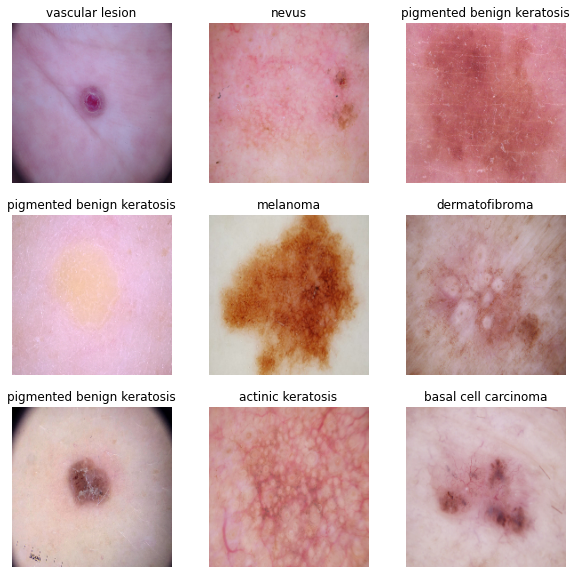

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
num_classes = 9

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        9248      
                                                      

### Train the model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 532ms/step - loss: 2.0895 - accuracy: 0.2132 - val_loss: 2.0186 - val_accuracy: 0.1745
Epoch 2/20
56/56 [==============================] - 29s 521ms/step - loss: 1.9303 - accuracy: 0.2450 - val_loss: 1.9127 - val_accuracy: 0.2729
Epoch 3/20
56/56 [==============================] - 31s 548ms/step - loss: 1.7803 - accuracy: 0.3404 - val_loss: 1.6947 - val_accuracy: 0.3781
Epoch 4/20
56/56 [==============================] - 32s 565ms/step - loss: 1.6198 - accuracy: 0.4135 - val_loss: 1.6279 - val_accuracy: 0.4273
Epoch 5/20
56/56 [==============================] - 30s 537ms/step - loss: 1.5716 - accuracy: 0.4252 - val_loss: 1.7534 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 30s 544ms/step - loss: 1.6039 - accuracy: 0.4241 - val_loss: 1.6714 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 30s 538ms/step - loss: 1.4786 - accuracy: 0.4738 - val_loss: 1.5175 - val_accuracy: 0.5101

### Visualizing training results

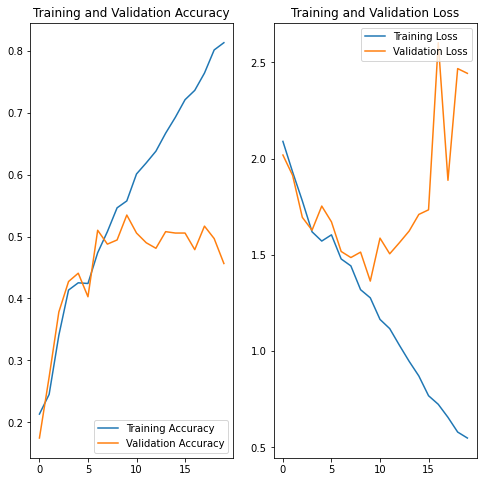

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy of Train Dataset: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss of Train Dataset: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 71ms/step - loss: 2.4431 - accuracy: 0.4564
Accuracy of Train Dataset:  0.7717633843421936
Validation Accuracy:  0.4563758373260498
Loss of Train Dataset:  0.6407423615455627
Validation Loss 2.443125009536743


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### Findings on the first base model

Model seems to be little overfitting because there is a difference in accuracy and loss function in training and test round after tenth epoch


In [22]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                            layers.experimental.preprocessing.RandomRotation(0.15),
                            layers.experimental.preprocessing.RandomZoom(0.15),
])

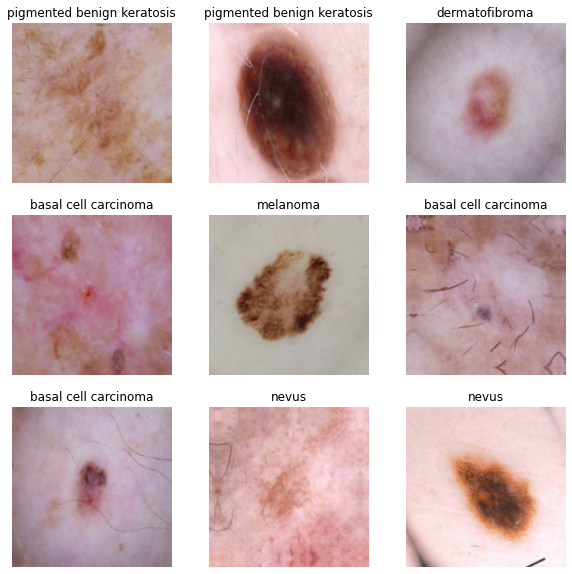

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))

### Compiling the model

In [25]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

### Training the model

In [27]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 564ms/step - loss: 1.9928 - accuracy: 0.2366 - val_loss: 1.9359 - val_accuracy: 0.2752
Epoch 2/20
56/56 [==============================] - 31s 561ms/step - loss: 1.8104 - accuracy: 0.3337 - val_loss: 1.6574 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 30s 543ms/step - loss: 1.7085 - accuracy: 0.3683 - val_loss: 1.6440 - val_accuracy: 0.4318
Epoch 4/20
56/56 [==============================] - 31s 554ms/step - loss: 1.5982 - accuracy: 0.4297 - val_loss: 1.5311 - val_accuracy: 0.4586
Epoch 5/20
56/56 [==============================] - 32s 571ms/step - loss: 1.5694 - accuracy: 0.4353 - val_loss: 1.5067 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 31s 557ms/step - loss: 1.4690 - accuracy: 0.4838 - val_loss: 1.5519 - val_accuracy: 0.4474
Epoch 7/20
56/56 [==============================] - 31s 551ms/step - loss: 1.4579 - accuracy: 0.4849 - val_loss: 1.6588 - val_accuracy: 0.4430

### Visualizing the results

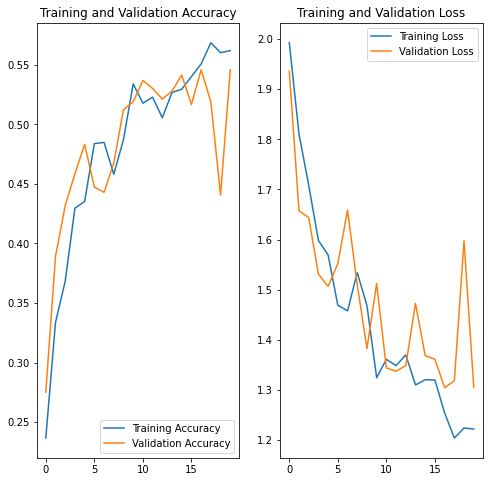

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy of Train Dataset: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss of Train Dataset: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 72ms/step - loss: 1.3052 - accuracy: 0.5459
Accuracy of Train Dataset:  0.5926339030265808
Validation Accuracy:  0.5458613038063049
Loss of Train Dataset:  1.107532262802124
Validation Loss 1.3052151203155518


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Finding from the second model

- There is a decrease in accuracy as compared to previous model

- Accuracy could increase if we increase the epoch

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


<BarContainer object of 9 artists>

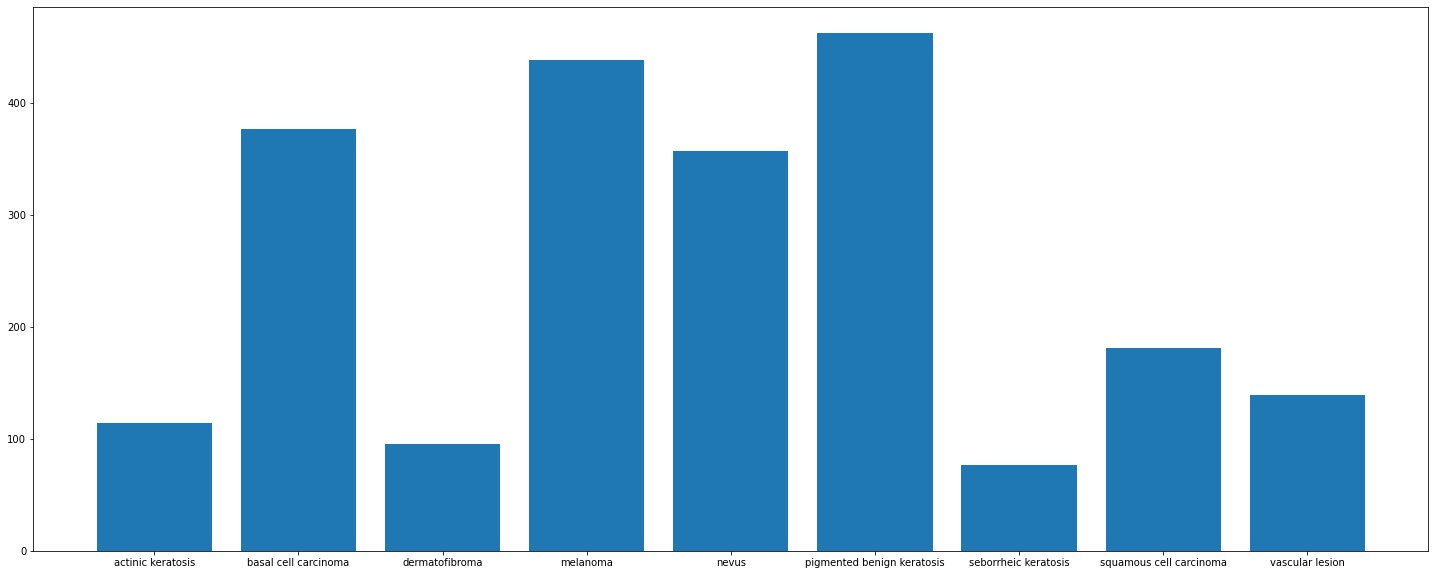

In [31]:
images_count=[]
for i in class_names:
    images_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,images_count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer 1 - "seborrheic keratosis" has the least number of samples

Answer 2 - "pigmented benign keratosis", melanoma", "nevus" and "basal cell carcinoma" dominate the data

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B06912DF0>: 100%|█| 500/500 [00:01<00:00, 295.99 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B08648400>:   7%| | 35/500 [00:00<00:03, 126.37 Samples/

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B07E2EF10>: 100%|█| 500/500 [00:01<00:00, 342.14 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B06912A60>:   4%| | 21/500 [00:00<00:04, 98.99 Samples/s

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B08207F40>: 100%|█| 500/500 [00:01<00:00, 338.93 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x24B06940610>: 100%|█| 500/500 [00:07<00:
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x24B08207D90>:   0%| | 0/500 [00:00<?, ? 

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2283x1824 at 0x24B080C7AF0>: 100%|█| 500/500 [00:06<00:00, 80.75 Sample
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B080ACC70>:   6%| | 30/500 [00:00<00:02, 194.72 Samples/

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24B7D5CDA00>: 100%|█| 500/500 [00:01<00:
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x24B06957910>:   2%| | 11/500 [00:00<00:

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x24B080AC4F0>: 100%|█| 500/500 [00:02<00:00, 167.60 Sample
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B0861E430>:   9%| | 44/500 [00:00<00:03, 127.75 Samples/

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B069A80D0>: 100%|█| 500/500 [00:01<00:00, 363.43 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B080C7EB0>:   7%| | 33/500 [00:00<00:02, 177.56 Samples/

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24B0691C460>: 100%|█| 500/500 [00:01<00:00, 355.02 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
from glob import glob

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_ae855366-41dd-4bf2-8197-4e4620005394.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e7dce790-408d-4e46-82d1-aa9158c4ce52.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e8aa2924-3be8-4a17-b597-675013b9ee9c.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_2ac0efed-bad4-464a-9c3a-711cb23228ad.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_fe895856-2b96-49ff-ad24-105df1074527.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [38]:
res = [ path_list_new[0], path_list_new[-1] ] 
print(res)

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_ae855366-41dd-4bf2-8197-4e4620005394.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0034214.jpg_941fd88e-8e69-4ce6-9053-4cbf6af8bf8e.jpg']


In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [39]:
res = [ lesion_list_new[0], lesion_list_new[-1] ] 
print(res)

['actinic keratosis', 'vascular lesion']


In [40]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [41]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [42]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
train_image_count_after_augmentation = len(list(data_dir_train.glob('**/*.jpg')))
print(train_image_count_after_augmentation)

6739


In [45]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [47]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [49]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

#### **Todo:**  Train your model

In [51]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 97s 551ms/step - loss: 1.9669 - accuracy: 0.2378 - val_loss: 1.7266 - val_accuracy: 0.3296
Epoch 2/50
169/169 [==============================] - 93s 548ms/step - loss: 1.5942 - accuracy: 0.3913 - val_loss: 1.5579 - val_accuracy: 0.3964
Epoch 3/50
169/169 [==============================] - 93s 551ms/step - loss: 1.5283 - accuracy: 0.4126 - val_loss: 1.4546 - val_accuracy: 0.4410
Epoch 4/50
169/169 [==============================] - 92s 546ms/step - loss: 1.4750 - accuracy: 0.4371 - val_loss: 1.4875 - val_accuracy: 0.4276
Epoch 5/50
169/169 [==============================] - 96s 567ms/step - loss: 1.4176 - accuracy: 0.4407 - val_loss: 1.4070 - val_accuracy: 0.4603
Epoch 6/50
169/169 [==============================] - 95s 562ms/step - loss: 1.3696 - accuracy: 0.4703 - val_loss: 1.3120 - val_accuracy: 0.4900
Epoch 7/50
169/169 [==============================] - 98s 578ms/step - loss: 1.3443 - accuracy: 0.4746 - val_loss: 1.2872 - val_ac

#### **Todo:**  Visualize the model results

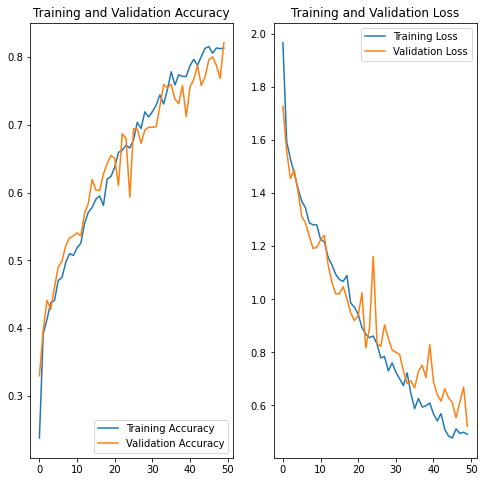

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy of Train Dataset: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss of Train Dataset: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 3s 71ms/step - loss: 0.5209 - accuracy: 0.8211
Accuracy of Train Dataset:  0.889465868473053
Validation Accuracy:  0.8210839033126831
Loss of Train Dataset:  0.3026888966560364
Validation Loss 0.5208816528320312


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Finding from the third model

- Accuracy on trainig data has increased to 88.95% after using the Augmentor library

- Validation accuracy has increased to 82%

- To improve the model further we have to tune the hyperparamaters

## Evaluation on Test Dataset

In [54]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [55]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on Test dataset")
loss_test, accuracy_test = model.evaluate(test_ds, batch_size=batch_size)

#print("test loss, test acc:", results)
print("Accuracy of Test Dataset: ", accuracy_test)
print("Loss of Test Dataset: ",loss_test)


Evaluate on Test dataset
4/4 [==============================] - 1s 69ms/step - loss: 5.5713 - accuracy: 0.3814
Accuracy of Test Dataset:  0.3813559412956238
Loss of Test Dataset:  5.571290016174316


### Finding of evaluation of Test Dataset using the third model

- Accuracy on the Test Dataset comes around 38.14%, validation accuracy of the same model was 82%

- This model need further improvement by tuning with hyperparamaters.